# Assignment08: Network Analysis

In [5]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [6]:
_send_jupyter_config_comm_request()

In [8]:
JupyterDash.infer_jupyter_proxy_config()

In [9]:
app = JupyterDash(__name__)

In [14]:
app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

In [15]:
app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/mtran9600@ucla.edu/proxy/8050/


In [17]:
with open('RJ_script.txt') as f:
    x = f.read()

In [18]:
x

"\nACT I\nPROLOGUE\n\n    Two households, both alike in dignity,\n    In fair Verona, where we lay our scene,\n    From ancient grudge break to new mutiny,\n    Where civil blood makes civil hands unclean.\n    From forth the fatal loins of these two foes\n    A pair of star-cross'd lovers take their life;\n    Whose misadventured piteous overthrows\n    Do with their death bury their parents' strife.\n    The fearful passage of their death-mark'd love,\n    And the continuance of their parents' rage,\n    Which, but their children's end, nought could remove,\n    Is now the two hours' traffic of our stage;\n    The which if you with patient ears attend,\n    What here shall miss, our toil shall strive to mend.\n\nSCENE I. Verona. A public place.\n\n    Enter SAMPSON and GREGORY, of the house of Capulet, armed with swords and bucklers \n\nSAMPSON\n\n    Gregory, o' my word, we'll not carry coals.\n\nGREGORY\n\n    No, for then we should be colliers.\n\nSAMPSON\n\n    I mean, an we be i

In [21]:
acts = x.split('ACT')

In [22]:
characters = ['ESCALUS',
'MERCUTIO', 
'PARIS', 
'MONTAGUE', 
'LADY MONTAGUE',
'ROMEO', 
'BENVOLIO',
'ABRAM',
'ALTHASAR',
'CAPULET',
'LADY CAPULET', 
'JULIET', 
'TYBALT', 
'CAPULET’S COUSIN',
'NURSE',
'PETER', 
'SAMPSON', 
'GREGORY', 
'FRIAR LAWRENCE',
'FRIAR JOHN',
'CHORUS'
]

In [23]:
len(acts)

6

Nodes of the graph will be the characters, and the edges will be the interactions between characters. 

In [24]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [25]:
charnum

{'ESCALUS': 0,
 'MERCUTIO': 4,
 'PARIS': 5,
 'MONTAGUE': 3,
 'LADY MONTAGUE': 1,
 'ROMEO': 14,
 'BENVOLIO': 7,
 'ABRAM': 0,
 'ALTHASAR': 3,
 'CAPULET': 12,
 'LADY CAPULET': 10,
 'JULIET': 11,
 'TYBALT': 3,
 'CAPULET’S COUSIN': 0,
 'NURSE': 1,
 'PETER': 3,
 'SAMPSON': 1,
 'GREGORY': 1,
 'FRIAR LAWRENCE': 0,
 'FRIAR JOHN': 1,
 'CHORUS': 0}

In [26]:
connections

{('ESCALUS', 'MERCUTIO'): 0,
 ('ESCALUS', 'PARIS'): 0,
 ('ESCALUS', 'MONTAGUE'): 0,
 ('ESCALUS', 'LADY MONTAGUE'): 0,
 ('ESCALUS', 'ROMEO'): 0,
 ('ESCALUS', 'BENVOLIO'): 0,
 ('ESCALUS', 'ABRAM'): 0,
 ('ESCALUS', 'ALTHASAR'): 0,
 ('ESCALUS', 'CAPULET'): 0,
 ('ESCALUS', 'LADY CAPULET'): 0,
 ('ESCALUS', 'JULIET'): 0,
 ('ESCALUS', 'TYBALT'): 0,
 ('ESCALUS', 'CAPULET’S COUSIN'): 0,
 ('ESCALUS', 'NURSE'): 0,
 ('ESCALUS', 'PETER'): 0,
 ('ESCALUS', 'SAMPSON'): 0,
 ('ESCALUS', 'GREGORY'): 0,
 ('ESCALUS', 'FRIAR LAWRENCE'): 0,
 ('ESCALUS', 'FRIAR JOHN'): 0,
 ('ESCALUS', 'CHORUS'): 0,
 ('MERCUTIO', 'PARIS'): 0,
 ('MERCUTIO', 'MONTAGUE'): 1,
 ('MERCUTIO', 'LADY MONTAGUE'): 0,
 ('MERCUTIO', 'ROMEO'): 4,
 ('MERCUTIO', 'BENVOLIO'): 4,
 ('MERCUTIO', 'ABRAM'): 0,
 ('MERCUTIO', 'ALTHASAR'): 0,
 ('MERCUTIO', 'CAPULET'): 1,
 ('MERCUTIO', 'LADY CAPULET'): 1,
 ('MERCUTIO', 'JULIET'): 0,
 ('MERCUTIO', 'TYBALT'): 1,
 ('MERCUTIO', 'CAPULET’S COUSIN'): 0,
 ('MERCUTIO', 'NURSE'): 1,
 ('MERCUTIO', 'PETER'): 1,
 (

In [27]:
for k,v in charnum.items():
    print(k,v)

ESCALUS 0
MERCUTIO 4
PARIS 5
MONTAGUE 3
LADY MONTAGUE 1
ROMEO 14
BENVOLIO 7
ABRAM 0
ALTHASAR 3
CAPULET 12
LADY CAPULET 10
JULIET 11
TYBALT 3
CAPULET’S COUSIN 0
NURSE 1
PETER 3
SAMPSON 1
GREGORY 1
FRIAR LAWRENCE 0
FRIAR JOHN 1
CHORUS 0


In [32]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'blue',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(str(int(weight)/10))',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/mtran9600@ucla.edu/proxy/8050/


In [71]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
#graphitems

10


In [72]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/mtran9600@ucla.edu/proxy/8050/


In [35]:
graphitems

[{'data': {'id': 'ESCALUS', 'label': 'Escalus', 'size': '0'}},
 {'data': {'id': 'MERCUTIO', 'label': 'Mercutio', 'size': '4'}},
 {'data': {'id': 'PARIS', 'label': 'Paris', 'size': '5'}},
 {'data': {'id': 'MONTAGUE', 'label': 'Montague', 'size': '3'}},
 {'data': {'id': 'LADY MONTAGUE', 'label': 'Lady Montague', 'size': '1'}},
 {'data': {'id': 'ROMEO', 'label': 'Romeo', 'size': '14'}},
 {'data': {'id': 'BENVOLIO', 'label': 'Benvolio', 'size': '7'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '0'}},
 {'data': {'id': 'ALTHASAR', 'label': 'Althasar', 'size': '3'}},
 {'data': {'id': 'CAPULET', 'label': 'Capulet', 'size': '12'}},
 {'data': {'id': 'LADY CAPULET', 'label': 'Lady Capulet', 'size': '10'}},
 {'data': {'id': 'JULIET', 'label': 'Juliet', 'size': '11'}},
 {'data': {'id': 'TYBALT', 'label': 'Tybalt', 'size': '3'}},
 {'data': {'id': 'CAPULET’S COUSIN',
   'label': 'Capulet’S Cousin',
   'size': '0'}},
 {'data': {'id': 'NURSE', 'label': 'Nurse', 'size': '1'}},
 {'data': {'id': 

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('MERCUTIO', 'MONTAGUE'),
 ('MERCUTIO', 'ROMEO'),
 ('MERCUTIO', 'BENVOLIO'),
 ('MERCUTIO', 'CAPULET'),
 ('MERCUTIO', 'LADY CAPULET'),
 ('MERCUTIO', 'TYBALT'),
 ('MERCUTIO', 'NURSE'),
 ('MERCUTIO', 'PETER'),
 ('PARIS', 'MONTAGUE'),
 ('PARIS', 'ROMEO'),
 ('PARIS', 'BENVOLIO'),
 ('PARIS', 'ALTHASAR'),
 ('PARIS', 'CAPULET'),
 ('PARIS', 'LADY CAPULET'),
 ('PARIS', 'JULIET'),
 ('PARIS', 'PETER'),
 ('MONTAGUE', 'LADY MONTAGUE'),
 ('MONTAGUE', 'ROMEO'),
 ('MONTAGUE', 'BENVOLIO'),
 ('MONTAGUE', 'ALTHASAR'),
 ('MONTAGUE', 'CAPULET'),
 ('MONTAGUE', 'LADY CAPULET'),
 ('MONTAGUE', 'JULIET'),
 ('MONTAGUE', 'TYBALT'),
 ('MONTAGUE', 'SAMPSON'),
 ('MONTAGUE', 'GREGORY'),
 ('LADY MONTAGUE', 'ROMEO'),
 ('LADY MONTAGUE', 'BENVOLIO'),
 ('LADY MONTAGUE', 'ALTHASAR'),
 ('LADY MONTAGUE', 'CAPULET'),
 ('LADY MONTAGUE', 'LADY CAPULET'),
 ('LADY MONTAGUE', 'TYBALT'),
 ('LADY MONTAGUE', 'SAMPSON'),
 ('LADY MONTAGUE', 'GREGORY'),
 ('ROMEO', 'BENVOLIO'),
 ('ROMEO', 'ALTHASAR'),
 ('ROMEO', 'CAPULET'),
 ('ROMEO', 'L

In [38]:
G = nx.Graph()

In [39]:
G.add_edges_from(nxgraphitems)

In [40]:
G.nodes

NodeView(('MERCUTIO', 'MONTAGUE', 'ROMEO', 'BENVOLIO', 'CAPULET', 'LADY CAPULET', 'TYBALT', 'NURSE', 'PETER', 'PARIS', 'ALTHASAR', 'JULIET', 'LADY MONTAGUE', 'SAMPSON', 'GREGORY'))

In [41]:
nx.degree_centrality(G)

{'MERCUTIO': 0.5714285714285714,
 'MONTAGUE': 0.8571428571428571,
 'ROMEO': 1.0,
 'BENVOLIO': 1.0,
 'CAPULET': 0.9285714285714285,
 'LADY CAPULET': 0.9285714285714285,
 'TYBALT': 0.7857142857142857,
 'NURSE': 0.2857142857142857,
 'PETER': 0.5714285714285714,
 'PARIS': 0.5714285714285714,
 'ALTHASAR': 0.7857142857142857,
 'JULIET': 0.6428571428571428,
 'LADY MONTAGUE': 0.6428571428571428,
 'SAMPSON': 0.6428571428571428,
 'GREGORY': 0.6428571428571428}

In [42]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Romeo          : 1.000
Benvolio       : 1.000
Capulet        : 0.929
Lady Capulet   : 0.929
Montague       : 0.857
Tybalt         : 0.786
Althasar       : 0.786
Juliet         : 0.643
Lady Montague  : 0.643
Sampson        : 0.643
Gregory        : 0.643
Mercutio       : 0.571
Peter          : 0.571
Paris          : 0.571
Nurse          : 0.286


In [43]:
nx.betweenness_centrality(G)

{'MERCUTIO': 0.01622187336473051,
 'MONTAGUE': 0.02250130821559393,
 'ROMEO': 0.07810047095761383,
 'BENVOLIO': 0.07810047095761383,
 'CAPULET': 0.03597592883307169,
 'LADY CAPULET': 0.03597592883307169,
 'TYBALT': 0.01360544217687075,
 'NURSE': 0.0,
 'PETER': 0.01622187336473051,
 'PARIS': 0.0034013605442176874,
 'ALTHASAR': 0.011773940345368918,
 'JULIET': 0.006802721088435375,
 'LADY MONTAGUE': 0.0,
 'SAMPSON': 0.0,
 'GREGORY': 0.0}

In [44]:
dc = nx.betweenness_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Romeo          : 0.078
Benvolio       : 0.078
Capulet        : 0.036
Lady Capulet   : 0.036
Montague       : 0.023
Mercutio       : 0.016
Peter          : 0.016
Tybalt         : 0.014
Althasar       : 0.012
Juliet         : 0.007
Paris          : 0.003
Nurse          : 0.000
Lady Montague  : 0.000
Sampson        : 0.000
Gregory        : 0.000


In [45]:
from networkx.algorithms.community import greedy_modularity_communities

In [46]:
greedy_modularity_communities(G)

[frozenset({'ALTHASAR',
            'CAPULET',
            'GREGORY',
            'JULIET',
            'LADY CAPULET',
            'LADY MONTAGUE',
            'MONTAGUE',
            'PARIS',
            'SAMPSON',
            'TYBALT'}),
 frozenset({'BENVOLIO', 'MERCUTIO', 'NURSE', 'PETER', 'ROMEO'})]

In [47]:
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [48]:
modularity_class

{'CAPULET': 0,
 'GREGORY': 0,
 'TYBALT': 0,
 'SAMPSON': 0,
 'JULIET': 0,
 'LADY CAPULET': 0,
 'LADY MONTAGUE': 0,
 'PARIS': 0,
 'MONTAGUE': 0,
 'ALTHASAR': 0,
 'BENVOLIO': 1,
 'NURSE': 1,
 'ROMEO': 1,
 'MERCUTIO': 1,
 'PETER': 1}

[['CAPULET', 'GREGORY', 'TYBALT', 'SAMPSON', 'JULIET', 'LADY CAPULET', 'LADY MONTAGUE', 'PARIS', 'MONTAGUE', 'ALTHASAR'], ['BENVOLIO', 'NURSE', 'ROMEO', 'MERCUTIO', 'PETER']]


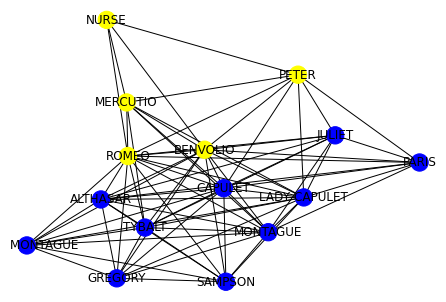

In [56]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [75]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'red'
    else:
        modularity = 'green'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

10


[{'data': {'id': 'ESCALUS',
   'label': 'Escalus',
   'size': '0',
   'modularity': 'green'}},
 {'data': {'id': 'MERCUTIO',
   'label': 'Mercutio',
   'size': '4',
   'modularity': 'red'}},
 {'data': {'id': 'PARIS',
   'label': 'Paris',
   'size': '5',
   'modularity': 'blue'}},
 {'data': {'id': 'MONTAGUE',
   'label': 'Montague',
   'size': '3',
   'modularity': 'blue'}},
 {'data': {'id': 'LADY MONTAGUE',
   'label': 'Lady Montague',
   'size': '1',
   'modularity': 'blue'}},
 {'data': {'id': 'ROMEO',
   'label': 'Romeo',
   'size': '14',
   'modularity': 'red'}},
 {'data': {'id': 'BENVOLIO',
   'label': 'Benvolio',
   'size': '7',
   'modularity': 'red'}},
 {'data': {'id': 'ABRAM',
   'label': 'Abram',
   'size': '0',
   'modularity': 'green'}},
 {'data': {'id': 'ALTHASAR',
   'label': 'Althasar',
   'size': '3',
   'modularity': 'blue'}},
 {'data': {'id': 'CAPULET',
   'label': 'Capulet',
   'size': '12',
   'modularity': 'blue'}},
 {'data': {'id': 'LADY CAPULET',
   'label': 'Lady 

### Final Graph 

In [76]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'pink',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/mtran9600@ucla.edu/proxy/8050/


Combining all the quantitative measures of character interactions, I was surprised to see that the most central characters were not Romeo and Juliet, as the name of this play would suggest! While Romeo has a 1.0 rating of centrality (along with Benvolio) Juliet is the 8th character according to highest degree of centrality! I find this interesting because although Juliet may be an important figure in the plot of the story, in practice, she is not relevant in character interactions (being 8th out of a cast of 15 characters!) 

Within the context of the story, it makes sense that Juliet may not have the limelight, after all Romeo is the main protagonist. However, after conducting community analysis, even within her own spheres, Juliet is still not one of the central characters (as we have defined it by interactions) being outclassed by her parents, Lord and Lady Capulet. I think that this is indicative of the times that thisp